In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
#import utils 
#from utils.helper import fn_plot_tf_hist, fn_plot_confusion_matrix
from helper import fn_plot_tf_hist, fn_plot_confusion_matrix

C:\Users\duasp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
inpDir = os.path.join( '..', 'input')


###moduleDir = 'MACHINE LEARNING'

outDir = os.path.join('output')
subDir = 'fifa_2019'

# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results
rng = np.random.default_rng(seed = RANDOM_STATE)

N_SAMPLES = 2560
ALPHA = 0.001     # learning rate
EPOCHS = 32
BATCH_SIZE = 32


# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'savefig.dpi': 150,
          'image.cmap': 'jet',
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 2,
          'legend.numpoints' : 1
         }
CMAP = plt.cm.rainbow
plt.rcParams.update(params);
plt.set_cmap(CMAP);
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE=0.2

np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('display.precision', 2)

__all__ = ['np', 'display', 'plt', 'pd', 'sklearn', 'seaborn']

<Figure size 1500x600 with 0 Axes>

### Prevent Tensorflow from hogging the memory

In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
physical_devices

[]

In [5]:
data_df=pd.read_csv(os.path.join(inpDir, 'fifa_2019.csv'))
data_df

,Unnamed: 0,ID,Name,Age,...,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,...,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,...,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,...,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,...,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,...,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,...,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,...,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,...,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,...,14.0,8.0,9.0,€143K


In [6]:
data_df.head()

,Unnamed: 0,ID,Name,Age,...,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,...,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,...,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,...,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,...,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,...,5.0,10.0,13.0,€196.4M


In [7]:
cols = data_df.columns
for col in cols:
    print(f'\nColumns Name: {col} : {data_df[col].unique()}')


Columns Name: Unnamed: 0 : [    0     1     2 ... 18204 18205 18206]

Columns Name: ID : [158023  20801 190871 ... 241638 246268 246269]

Columns Name: Name : ['L. Messi' 'Cristiano Ronaldo' 'Neymar Jr' ... 'B. Worman'
 'D. Walker-Rice' 'G. Nugent']

Columns Name: Age : [31 33 26 27 32 25 29 28 24 30 19 40 22 23 34 35 36 37 21 18 20 39 41 17
 38 45 42 16 44]

Columns Name: Photo : ['https://cdn.sofifa.org/players/4/19/158023.png'
 'https://cdn.sofifa.org/players/4/19/20801.png'
 'https://cdn.sofifa.org/players/4/19/190871.png' ...
 'https://cdn.sofifa.org/players/4/19/241638.png'
 'https://cdn.sofifa.org/players/4/19/246268.png'
 'https://cdn.sofifa.org/players/4/19/246269.png']

Columns Name: Nationality : ['Argentina' 'Portugal' 'Brazil' 'Spain' 'Belgium' 'Croatia' 'Uruguay'
 'Slovenia' 'Poland' 'Germany' 'France' 'England' 'Italy' 'Egypt'
 'Colombia' 'Denmark' 'Gabon' 'Wales' 'Senegal' 'Costa Rica' 'Slovakia'
 'Netherlands' 'Bosnia Herzegovina' 'Morocco' 'Serbia' 'Algeria' 'Austria

In [8]:
data_df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [9]:
data_df = data_df[data_df['Position'].notnull()]
data_df.head()

,Unnamed: 0,ID,Name,Age,...,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,...,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,...,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,...,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,...,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,...,5.0,10.0,13.0,€196.4M


In [10]:
# Following columns appear to be relevant for our analysis
rel_cols = ['Position', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
            'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
            'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
            'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
            'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
            'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
            'GKKicking', 'GKPositioning', 'GKReflexes']

In [11]:
data_df = data_df[rel_cols]
data_df.head()

,Position,Finishing,HeadingAccuracy,ShortPassing,...,GKHandling,GKKicking,GKPositioning,GKReflexes
0,RF,95.0,70.0,90.0,...,11.0,15.0,14.0,8.0
1,ST,94.0,89.0,81.0,...,11.0,15.0,14.0,11.0
2,LW,87.0,62.0,84.0,...,9.0,15.0,15.0,11.0
3,GK,13.0,21.0,50.0,...,85.0,87.0,88.0,94.0
4,RCM,82.0,55.0,92.0,...,13.0,5.0,10.0,13.0


In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18147 entries, 0 to 18206
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Position         18147 non-null  object 
 1   Finishing        18147 non-null  float64
 2   HeadingAccuracy  18147 non-null  float64
 3   ShortPassing     18147 non-null  float64
 4   Volleys          18147 non-null  float64
 5   Dribbling        18147 non-null  float64
 6   Curve            18147 non-null  float64
 7   FKAccuracy       18147 non-null  float64
 8   LongPassing      18147 non-null  float64
 9   BallControl      18147 non-null  float64
 10  Acceleration     18147 non-null  float64
 11  SprintSpeed      18147 non-null  float64
 12  Agility          18147 non-null  float64
 13  Reactions        18147 non-null  float64
 14  Balance          18147 non-null  float64
 15  ShotPower        18147 non-null  float64
 16  Jumping          18147 non-null  float64
 17  Stamina          

In [13]:
data_df['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [14]:
goalkeeper = 'GK'
forward = ['RF', 'ST', 'LW', 'RW', 'LF', 'RS', 'LS', 'CF']
midfielder = ['CM', 'RCM', 'LCM', 'CDM', 'RDM', 'LDM', 'CAM', 'LAM', 'RAM', 'RM', 'LM']
defender = ['CB', 'RCB', 'LCB', 'RWB', 'LWB', 'RB', 'LB']

In [15]:
len(data_df['Position'].unique()) - len(forward) - len(midfielder) - len(defender)

1

In [16]:
# Assign labels to goalkeepers
data_df.loc[data_df['Position'] == 'GK', 'Position'] = 0

# Defenders
data_df.loc[data_df['Position'].isin(defender), 'Position'] = 1

# Mid-fielders
data_df.loc[data_df['Position'].isin(midfielder), 'Position'] = 2

# Forwards
data_df.loc[data_df['Position'].isin(forward), 'Position'] = 3

# Assist Pandas in data conversion
data_df['Position'] = pd.to_numeric(data_df['Position'], downcast = 'integer')

In [17]:
labels_dic = {0: 'Goalkeeper', 1: 'Defender', 2: 'Mid-Fielder', 3: 'Forward'}

In [18]:
features_df = data_df.drop('Position', axis = 1)
labels = data_df.Position

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features_df, labels,
                                                    test_size = TEST_SIZE, stratify = labels,
                                                    random_state = RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14517, 33), (3630, 33), (14517,), (3630,))

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
dor1 = 0.1
dor2 = 0.15
dor3 = 0.25

model = tf.keras.Sequential([
    tf.keras.layers.Dense(66, activation = 'relu'),          ### layer 1
    tf.keras.layers.Dropout(dor1, seed = RANDOM_STATE),      ### Dropout for layer 1
    
    tf.keras.layers.Dense(33, activation = 'relu'),          ### layer 2
    tf.keras.layers.Dropout(dor2, seed = RANDOM_STATE),      ### Dropout for layer 2
    
    tf.keras.layers.Dense(18, activation = 'relu'),          ### layer 3
    tf.keras.layers.Dropout(dor3, seed = RANDOM_STATE),      ### Dropout for layer 3
    
    tf.keras.layers.Dense(4)       # no activation here
])

In [22]:
X_train[:1].shape

(1, 33)

In [23]:
prediction = model(X_train[:1]).numpy()
prediction.sum()

0.48532373

In [24]:
tf.nn.softmax(prediction).numpy().sum()

1.0

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (1, 66)                     │           2,244 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (1, 66)                     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (1, 33)                     │           2,211 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (1, 33)                     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (1, 18)                     │             612 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (1, 18)                     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (1, 4)                      │              76 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,143 (20.09 KB)

 Trainable params: 5,143 (20.09 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [27]:
y_train[:1].to_numpy()

array([3], dtype=int8)

In [28]:
loss_fn(y_train[:1], prediction).numpy()

1.3717326

In [29]:
model.compile(optimizer = 'Adam', loss = loss_fn, metrics = ['accuracy'])

### Training our model

In [30]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = BATCH_SIZE, epochs = EPOCHS)

Epoch 1/32
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7035 - loss: 0.7387 - val_accuracy: 0.8579 - val_loss: 0.3252
Epoch 2/32
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.8502 - loss: 0.3673 - val_accuracy: 0.8697 - val_loss: 0.3094
Epoch 3/32
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.8656 - loss: 0.3406 - val_accuracy: 0.8749 - val_loss: 0.3075
Epoch 4/32
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.8757 - loss: 0.3282 - val_accuracy: 0.8736 - val_loss: 0.2994
Epoch 5/32
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.8723 - loss: 0.3198 - val_accuracy: 0.8700 - val_loss: 0.3034
Epoch 6/32
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.8765 - loss: 0.3111 - val_accuracy: 0.8782 - val_loss: 0.2964
Epoch 7/32
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.8808 - loss: 0.3055 - val_accuracy: 0.8730 - val_loss: 0.3016
Epoch 8/32
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.8739 - loss: 0.3107 - va

In [31]:
model.evaluate(X_test, y_test, verbose = 2)

114/114 - 0s - 645us/step - accuracy: 0.8744 - loss: 0.3111


[0.31110674142837524, 0.8743801712989807]

In [32]:
loss_df = pd.DataFrame(history.history)
loss_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.78,0.54,0.86,0.33
1,0.85,0.37,0.87,0.31
2,0.86,0.34,0.87,0.31
3,0.87,0.33,0.87,0.30
4,0.87,0.32,0.87,0.30


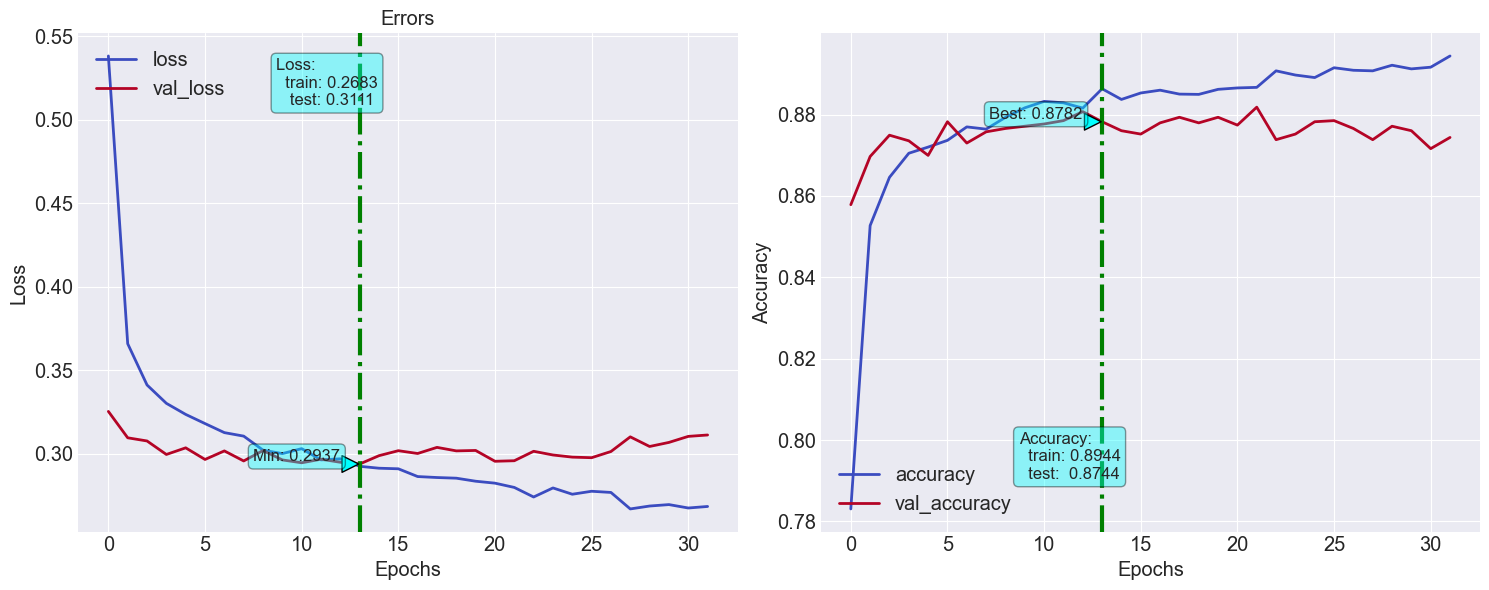

In [33]:
fn_plot_tf_hist(loss_df)

In [34]:
y_logits = model(X_train)
y_pred1 = tf.nn.softmax(y_logits).numpy()

In [35]:
y_pred1

array([[0.   , 0.   , 0.021, 0.979],
       [0.   , 0.   , 0.616, 0.384],
       [0.   , 0.   , 0.786, 0.214],
       ...,
       [1.   , 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   ]], dtype=float32)

In [36]:
pred_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [37]:
y_pred = pred_model(X_train).numpy()
y_pred

array([[0.   , 0.   , 0.021, 0.979],
       [0.   , 0.   , 0.616, 0.384],
       [0.   , 0.   , 0.786, 0.214],
       ...,
       [1.   , 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   ]], dtype=float32)

In [38]:
print(classification_report(y_train, y_pred.argmax(axis = 1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1620
           1       0.93      0.96      0.94      4693
           2       0.87      0.87      0.87      5470
           3       0.86      0.81      0.83      2734

    accuracy                           0.90     14517
   macro avg       0.92      0.91      0.91     14517
weighted avg       0.90      0.90      0.90     14517



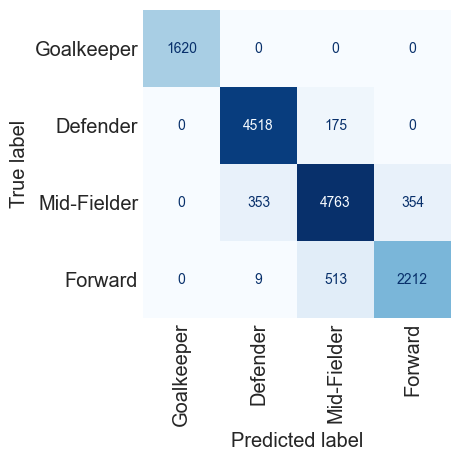

In [39]:
fn_plot_confusion_matrix(y_train,y_pred.argmax(axis = 1), labels_dic)

In [40]:
y_pred = pred_model(X_test).numpy()
y_pred

array([[0.   , 0.   , 0.553, 0.447],
       [0.   , 0.   , 0.735, 0.265],
       [0.   , 0.   , 0.29 , 0.71 ],
       ...,
       [0.   , 0.016, 0.915, 0.07 ],
       [0.   , 0.   , 0.965, 0.035],
       [0.   , 0.886, 0.114, 0.   ]], dtype=float32)

In [41]:
print(classification_report(y_test, y_pred.argmax(axis = 1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       0.90      0.94      0.92      1173
           2       0.84      0.84      0.84      1368
           3       0.83      0.75      0.79       684

    accuracy                           0.87      3630
   macro avg       0.89      0.88      0.89      3630
weighted avg       0.87      0.87      0.87      3630



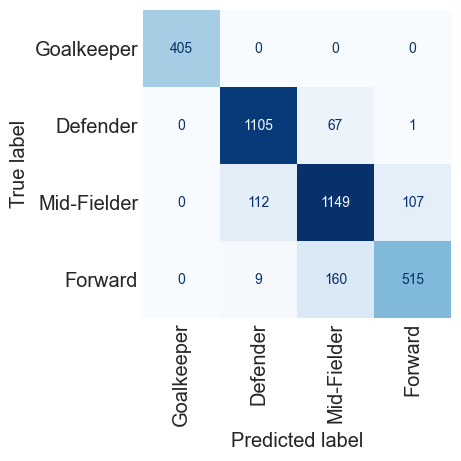

In [42]:
fn_plot_confusion_matrix(y_test,y_pred.argmax(axis = 1), labels_dic)